In [1]:
#Setup#
import urllib.request, urllib.parse, urllib.error
import json
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib
import matplotlib.pyplot as plt
import os
import sqlite3 as sql 
import pandas as pd
import numpy as np 
!pip install ipython-sql
%load_ext sql
%sql sqlite://

In [5]:
#Reads new cleaned csvs for connecting#
DIS= pd.read_csv('/Users/Brett/Desktop/Disney_dataframe.csv')
BRKA= pd.read_csv('/Users/Brett/Desktop/Berkshire_dataframe.csv')
IBM= pd.read_csv('/Users/Brett/Desktop/IBM_dataframe 2.csv')
TSLA= pd.read_csv('/Users/Brett/Desktop/Tesla_dataframe 2.csv')
Sector= pd.read_csv('/Users/Brett/Desktop/Sectors_dataframe.csv')
AMZN= pd.read_csv('/Users/Brett/Desktop/Amazon_dataframe 6.09.08 PM.csv')

In [6]:
#connect to a database
conn10 = sql.connect("NewData.db") 
#store your table in the database:
DIS.to_sql('DisneyN', conn10)
AMZN.to_sql('AmazonN', conn10)
BRKA.to_sql('BRKAN', conn10)
IBM.to_sql('IBMN', conn10)
TSLA.to_sql('TSLAN', conn10)
Sector.to_sql('SectorN', conn10)


In [7]:
#Joins the data together in a new data base that is held in SQLite (Plese see attached file to see it)#
with sql.connect('/Users/Brett/Desktop/NewData.db') as conn:

    c = conn.cursor()

    rows = c.execute("CREATE TABLE NewDATA AS SELECT * FROM AmazonN UNION SELECT * FROM DisneyN UNION SELECT * FROM BRKAN UNION SELECT * FROM IBMN UNION SELECT * FROM TSLAN ")

    for row in rows:

        print(row)

In [9]:
#Pulls selects all the data from the SQL Database# 
with sql.connect('/Users/Brett/Desktop/NewData.db') as conn:

    c = conn.cursor()

    rows = c.execute("SELECT * FROM NewDATA")
    
    for row in rows:

        print(row)


(0, 'AMZN', 'January', 1883.55, 4040167.1)
(0, 'BRKA', 'January', 340627.2, 237.05)
(0, 'DIS', 'January', 142.6, 9403147.25)
(0, 'IBM', 'January', 143.73, 112864967.0)
(0, 'TSLA', 'January', 650.57, 407218500.0)
(1, 'AMZN', 'February', 2066.18, 4871367.21)
(1, 'BRKA', 'February', 335645.47, 311.84)
(1, 'DIS', 'February', 136.69, 15532676.16)
(1, 'IBM', 'February', 130.15, 118092333.0)
(1, 'TSLA', 'February', 667.99, 473096600.0)
(2, 'AMZN', 'March', 1872.31, 7447496.91)
(2, 'BRKA', 'March', 283127.45, 859.68)
(2, 'DIS', 'March', 101.89, 28152544.09)
(2, 'IBM', 'March', 110.93, 189585053.0)
(2, 'TSLA', 'March', 524.0, 420935000.0)
(3, 'AMZN', 'April', 2244.76, 6025497.0)
(3, 'BRKA', 'April', 280929.16, 632.5)
(3, 'DIS', 'April', 102.87, 17978056.5)
(3, 'IBM', 'April', 125.56, 130400316.0)
(3, 'TSLA', 'April', 781.88, 381562400.0)
(4, 'AMZN', 'May', 2399.88, 3834119.89)
(4, 'BRKA', 'May', 264144.05, 407.63)
(4, 'DIS', 'May', 111.24, 23284998.32)
(4, 'IBM', 'May', 124.9, 92864791.0)
(4, '

In [10]:
#Creates a new CSV to work with from the SQL Database#
NEWDATA= pd.read_csv('/Users/Brett/Desktop/NewDATA.csv')
NEWDATA

,index,SYMBOL,DATE,CLOSE,VOLUME
0,0,AMZN,January,1883.55,4.040167e+06
1,0,BRKA,January,340627.20,2.370500e+02
2,0,DIS,January,142.60,9.403147e+06
3,0,IBM,January,143.73,1.128650e+08
4,0,TSLA,January,650.57,4.072185e+08
5,1,AMZN,February,2066.18,4.871367e+06
6,1,BRKA,February,335645.47,3.118400e+02
7,1,DIS,February,136.69,1.553268e+07
8,1,IBM,February,130.15,1.180923e+08
9,1,TSLA,February,667.99,4.730966e+08


<BarContainer object of 60 artists>

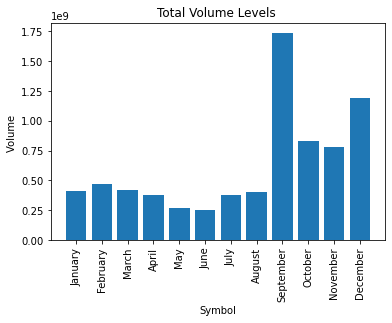

In [11]:
#Shows bar grpah for totl volume of all above stocks#
xi= NEWDATA['DATE']
yi= NEWDATA['VOLUME']
plt.title('Total Volume Levels ')
plt.xlabel('Symbol')
plt.ylabel('Volume ')
plt.xticks(rotation=90)
plt.bar(xi, yi)


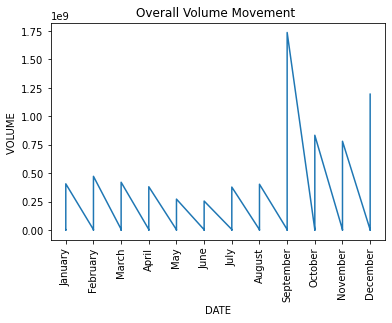

In [37]:
#Shows Line Graph of total volume for all above stocks#
xi= NEWDATA['DATE']
yi= NEWDATA['VOLUME']
plt.title('Overall Volume Movement ')
plt.xlabel('DATE')
plt.ylabel('VOLUME ')
plt.xticks(rotation=90)
plt.plot(xi, yi)


In [16]:
#Sorts each by month to get more detailed look at data#
January= NEWDATA[(NEWDATA["DATE"]=="January")]
Feb= NEWDATA[(NEWDATA["DATE"]=="February")]
March= NEWDATA[(NEWDATA["DATE"]=="March")]
April= NEWDATA[(NEWDATA["DATE"]=="April")]
May= NEWDATA[(NEWDATA["DATE"]=="May")]
June= NEWDATA[(NEWDATA["DATE"]=="June")]
July= NEWDATA[(NEWDATA["DATE"]=="July")]
August= NEWDATA[(NEWDATA["DATE"]=="August")]
September= NEWDATA[(NEWDATA["DATE"]=="September")]
October= NEWDATA[(NEWDATA["DATE"]=="October")]
November= NEWDATA[(NEWDATA["DATE"]=="November")]
December= NEWDATA[(NEWDATA["DATE"]=="December")]

<BarContainer object of 5 artists>

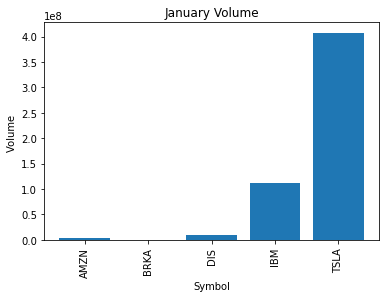

In [15]:
#Shows stock volume for January#
xc= January['SYMBOL']
yc= January['VOLUME']
plt.title('January Volume')
plt.xlabel('Symbol')
plt.ylabel('Volume ')
plt.xticks(rotation=90)
plt.bar(xc, yc)


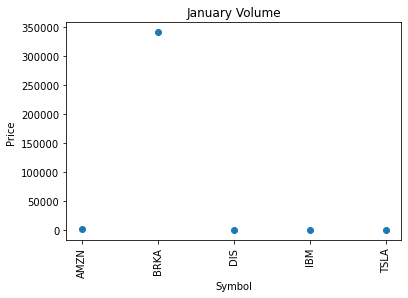

In [19]:
#Shows stock price for January#
xc= January['SYMBOL']
yc= January['CLOSE']
plt.title('January Price')
plt.xlabel('Symbol')
plt.ylabel('Price ')
plt.xticks(rotation=90)
plt.scatter(xc, yc)


<BarContainer object of 5 artists>

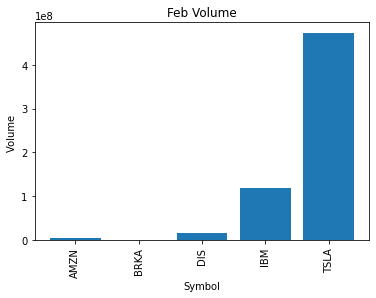

In [22]:
#Shows stock volume for February#
xf= Feb['SYMBOL']
yf= Feb['VOLUME']
plt.title('Feb Volume')
plt.xlabel('Symbol')
plt.ylabel('Volume ')
plt.xticks(rotation=90)
plt.bar(xf, yf)


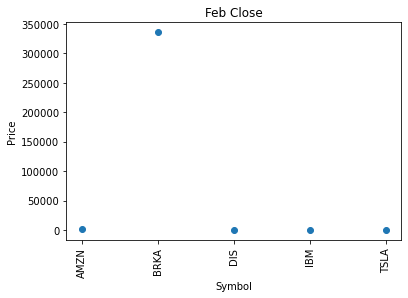

In [24]:
#Shows stock price for February#
xfe= Feb['SYMBOL']
yfe= Feb['CLOSE']
plt.title('Feb Close')
plt.xlabel('Symbol')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.scatter(xfe, yfe)

<BarContainer object of 5 artists>

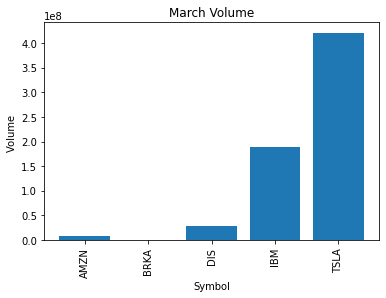

In [25]:
#Shows stock volume for March (This is when Coronavirus happened)#
xm= March['SYMBOL']
ym= March['VOLUME']
plt.title('March Volume')
plt.xlabel('Symbol')
plt.ylabel('Volume ')
plt.xticks(rotation=90)
plt.bar(xm, ym)

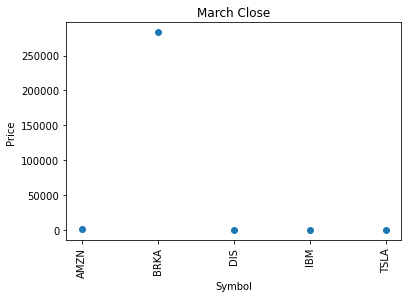

In [27]:
#Shows stock price for March (This is when Coronavirus happened)#
xma= March['SYMBOL']
yma= March['CLOSE']
plt.title('March Close')
plt.xlabel('Symbol')
plt.ylabel('Price ')
plt.xticks(rotation=90)
plt.scatter(xma, yma)

Text(0, 0.5, 'Frequency ')

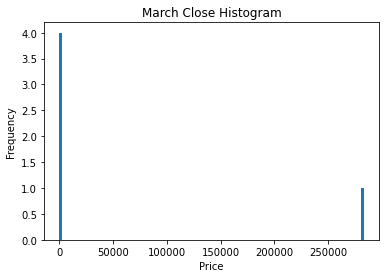

In [30]:
#Coronavirus histogram#
plt.hist(yma, bins = 100)
plt.title('March Close Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency ')

<AxesSubplot:>

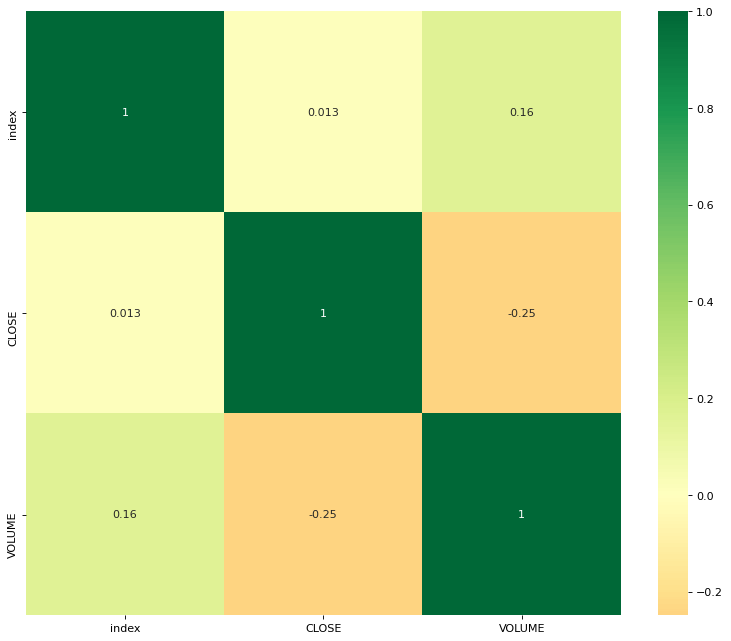

In [35]:
#Heat map for March# 
import seaborn as sns

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(NEWDATA.corr(), xticklabels=NEWDATA.corr().columns, yticklabels=NEWDATA.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [36]:
#Separates by individual stocks# 
Disney= NEWDATA[(NEWDATA["SYMBOL"]=="DIS")]
Berkshire= NEWDATA[(NEWDATA["SYMBOL"]=="BRKA")]
Tesla= NEWDATA[(NEWDATA["SYMBOL"]=="TSLA")]
Amazon= NEWDATA[(NEWDATA["SYMBOL"]=="AMZN")]
IBM= NEWDATA[(NEWDATA["SYMBOL"]=="IBM")]


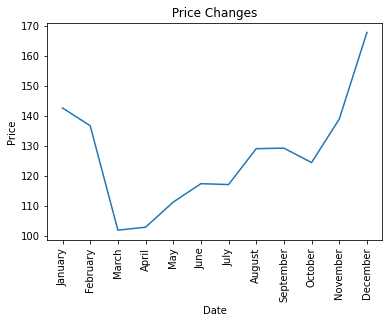

In [39]:
#Year graph showing Disney price movement# 
xD= Disney['DATE']
yD= Disney['CLOSE']
plt.title('Disney Price Changes ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.plot(xD, yD)

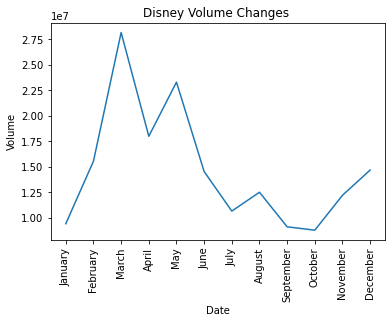

In [40]:
#Year graph showing Disney volume movement# 
xD= Disney['DATE']
yD= Disney['VOLUME']
plt.title('Disney Volume Changes ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.plot(xD, yD)

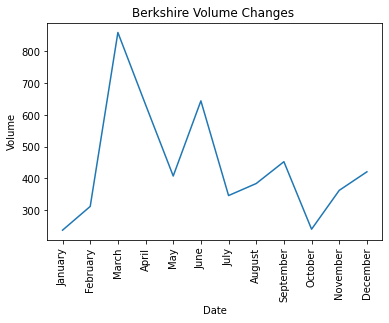

In [54]:
#Year graph showing Berkshire volume#
xB= Berkshire['DATE']
yB= Berkshire['VOLUME']
plt.title('Berkshire Volume Changes ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.plot(xB, yB)

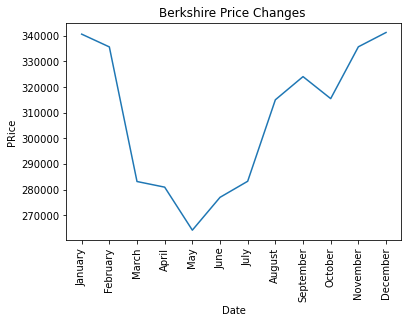

In [55]:
#Year graph showing Berkshire price#
xB= Berkshire['DATE']
yB= Berkshire['CLOSE']
plt.title('Berkshire Price Changes ')
plt.xlabel('Date')
plt.ylabel('PRice')
plt.xticks(rotation=90)
plt.plot(xB, yB)

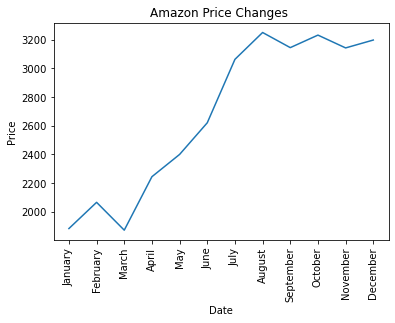

In [41]:
#Year graph showing Amazon price movement# 
xA= Amazon['DATE']
yA= Amazon['CLOSE']
plt.title('Amazon Price Changes ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.plot(xA, yA)

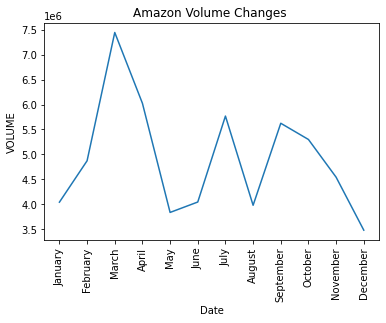

In [43]:
#Year graph showing Amazon volume movement# 
xA= Amazon['DATE']
yA= Amazon['VOLUME']
plt.title('Amazon Volume Changes ')
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.xticks(rotation=90)
plt.plot(xA, yA)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

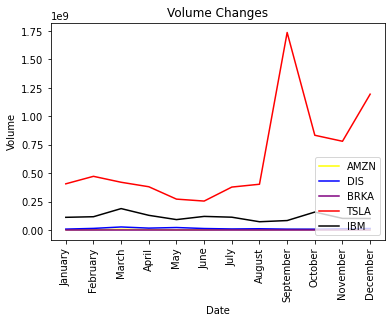

In [46]:
#Plots all the stocks together based on volume movement#
xB= Berkshire['DATE']
yB= Berkshire['VOLUME']
xT= Tesla['DATE']
yT= Tesla['VOLUME']
xI= IBM['DATE']
yI= IBM['VOLUME']
xA= Amazon['DATE']
yA= Amazon['VOLUME']
xD= Disney['DATE']
yD= Disney['VOLUME']

plt.plot(xA,yA, color= 'yellow', label='AMZN')

plt.plot(xD,yD, color= 'blue', label='DIS')

plt.plot(xB,yB, color= 'purple', label='BRKA')
plt.plot(xT,yT, color= 'red', label='TSLA')
plt.plot(xI,yI, color= 'black', label='IBM')
plt.legend(loc="lower right")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Changes')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

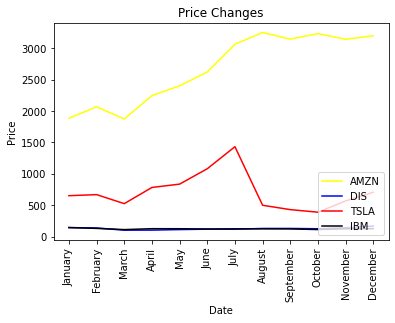

In [52]:
#Due to Berkshire being relatively stable in price, I wanted to show other stocks#
xT= Tesla['DATE']
yT= Tesla['CLOSE']
xI= IBM['DATE']
yI= IBM['CLOSE']
xA= Amazon['DATE']
yA= Amazon['CLOSE']
xD= Disney['DATE']
yD= Disney['CLOSE']

plt.plot(xA,yA, color= 'yellow', label='AMZN')

plt.plot(xD,yD, color= 'blue', label='DIS')

plt.plot(xT,yT, color= 'red', label='TSLA')
plt.plot(xI,yI, color= 'black', label='IBM')
plt.legend(loc="lower right")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

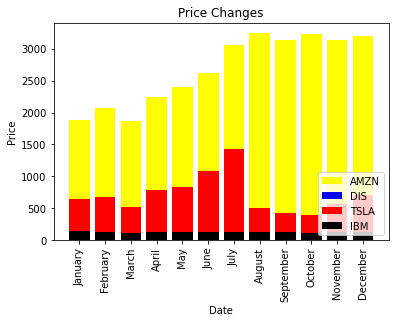

In [53]:
#Due to Berkshire being relatively stable in price, I wanted to show other stocks. This gives you the comparable market value#
xT= Tesla['DATE']
yT= Tesla['CLOSE']
xI= IBM['DATE']
yI= IBM['CLOSE']
xA= Amazon['DATE']
yA= Amazon['CLOSE']
xD= Disney['DATE']
yD= Disney['CLOSE']

plt.bar(xA,yA, color= 'yellow', label='AMZN')

plt.bar(xD,yD, color= 'blue', label='DIS')

plt.bar(xT,yT, color= 'red', label='TSLA')
plt.bar(xI,yI, color= 'black', label='IBM')
plt.legend(loc="lower right")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes')
plt.xticks(rotation=90)


## Final Project Write-Up ## 
This project was eye-opening to me in the world of data science. This was one of the most challenging and frustrating projects I have done. But it was also one of the most rewarding and satisfying when it was completed. Throughout this project I ran into several challenges. Which I believe came from the fact that I didn’t take a harder look at my data when choosing it. I went through the process and made decisions on things I thought I would enjoy. Rather than looking at what would work and be usable. This was a learning experience for me, because it made me more aware as a future data scientist. 

The first main challenge I had was with my web scrapping. This was a very difficult process for me because I chose a web scrap that was hard to navigate. The site made it difficult to pull the data off of. Once completed with that I realized that the data wasn’t a type that I could use in graphing and joining with the data base, which meant I couldn’t use it. Thus, why my sectors data was not joined because there was nothing to join the databases on. However, this was a fantastic learning experience for me. It allowed me to gain a better understanding of data, and what actually to look for when making these research decisions. I learned that it is important to take a full advantage of the correct resources if you are going to make research project work. 

Another area where I had issues was working with my API again. After submitting the API portion of the assignment, I went back into my notebook to pull the data once again to utilize for this final part. However, when doing this I ran into an issue where the API kept failing. I was told that the key had expired. Many hours later the key finally did start working back up, but it caused frustration on my part. 

The other challenge I had was understanding the concept of joining data together and placing it into one SQL database. SQL is still very new to me and it is not something that I have used in the past and haven’t really come across in other courses. When I saw my duty was to figure out how to merge the various data sets together into SQL and then pull the data to work with, I became confused and unsure. However, after four or five days of researching and learning I found the way that worked best for my data. 

Overall, this project was a challenging but, engaging experience. It allowed me to build upon my skills every step of the way and grow in this field. I was able to properly visualize the different stock data points and gain a better understanding of price and volume movements during 2020. I now see the value of combining various data together and now know what to properly look for. 